# Lecture 20 (5/11/2022)

**Announcements**
- Final projects! 

- TODO ERIK make next week's lab include some work component for final project

*Last time we covered:*
- ROC curves

**Today's agenda:**
- Common classification models


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Common Classification Models

- $k$-nearest neighbors
- Logistic regression
- Decision trees
- Support Vector Machines (SVMs)
- Other: naive Bayes, neural networks, discriminant analysis


## Data: Predicting Heart Disease


From [source](https://hastie.su.domains/ElemStatLearn/):

> A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

- sbp: systolic blood pressure
- tobacco: cumulative tobacco (kg)
- ldl: low densiity lipoprotein cholesterol
- adiposity
- famhist: family history of heart disease (Present, Absent)
- typea: type-A behavior
- obesity
- alcohol: current alcohol consumption
- age: age at onset
- chd: **response**, coronary heart disease

In [2]:
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data')

data

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


**Setting up our classifiers**:

Let's stick to just a single feature (age at onset) and see how different methods use this feature to predict the outcome label (CHD). 

In [3]:
x_vals = np.array(data['age']).reshape(len(data), 1)
y_vals = np.array(data['chd'])

xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, random_state = 1)

Text(0, 0.5, 'CHD')

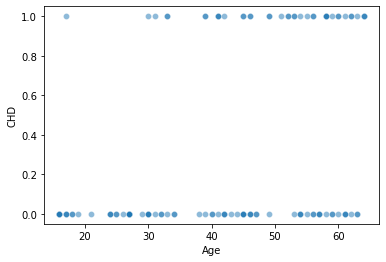

In [4]:
# sns.scatterplot(x = xtrain[:, 0], y = ytrain, alpha = .5)
sns.scatterplot(x = xtest[:, 0], y = ytest, alpha = .5)
plt.xlabel("Age")
plt.ylabel("CHD")

***Now, let's get started!***

## Logistic Regression

**How it works**:

In linear regression, the relationship between our predictor $x$ and our response variable $y$ was:

$y = \beta_0 + \beta_1 x$

If our $y$ values are all 0 or 1 (and assumed to be *Bernoulli distributed* with probability $p$), this approach doesn't work very well:
1. It predicts values <0 and >1 for some inputs $x$
2. It doesn't accomodate the fact that getting closer and closer to 1 gets harder and harder: one-unit changes in $x$ may not have equal changes in $p(y = 1)$. 

*So what do we do about this?*

Instead, we postulate the following relationship between $x$ and $y$:

$log \dfrac{p(y=1)}{p(y=0)} = \beta_0 + \beta_1 x$.

Every unit increase in $x$ leads to a $\beta_1$ increase in the *log odds of $y$* (or, every unit increase in $x$ leads to a $\beta_1$ *multiplication* of the *odds* of $y$).

This *logit transform* of our response variable $y$ solves both of the problems with linear regression above. 

However, the goal today isn't to get into the nitty-gritty of logistic regression. Instead, let's talk about how we use it as a classifier!

**Classification**

When we've fit a logistic regression to our data, we can output a probability $p(y)$ for any given $x$:

$p(y) = \dfrac{e^{h(x)}}{1+ e^{h(x)}}$

for $h(x) = \beta_0 + \beta_1x$.

$\dfrac{e^{h(x)}}{1+ e^{h(x)}}$ is the *logistic function* that maps from our $x$ variable to $p(y)$.

We can use this function as the basis for classification, where $p(y)$ greater than a threshold $T$ is given a particular label estimate $\hat{y}$.  


**Fitting parameters**

Even though logistic regression produces regression coefficients (intercept + slopes) similar to linear regression, these parameters are not estimated using the Ordinary Least Squares process we saw with linear regression. Instead, they are most often estimated using a more complicated process called Maximum Likelihood Estimation. 


### Logistic regression in python

You can read the scikit-learn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


In [5]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression
log_reg = LogisticRegression(random_state = 1)

# Fit the model
log_reg.fit(X = xtrain, y = ytrain)

LogisticRegression(random_state=1)

**What attributes do we get from this model fit?**

In [6]:
log_reg.classes_

log_reg.intercept_ # What does this mean?
np.exp(log_reg.intercept_[0]) / (1 + np.exp(log_reg.intercept_[0]))

log_reg.coef_ # What does this mean?
np.exp(log_reg.coef_[0][0])

1.06682882157164

**What functions does the model class give us?**

In [7]:
binary_preds = log_reg.predict(xtest)
binary_preds

soft_preds = log_reg.predict_proba(xtest)
soft_preds
# soft_preds[:, 0] # probability of 0


# Accuracy of hard classification predictions
log_reg.score(X = xtest, y = ytest) 


0.6637931034482759

**How did we do?**

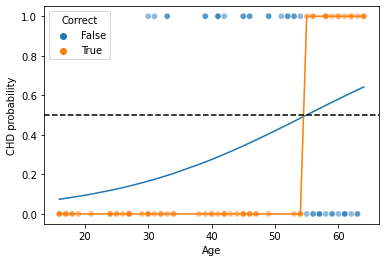

In [8]:
# Let's show the actual test data
g = sns.scatterplot(x = xtest[:, 0], y = ytest, hue = ytest == binary_preds, alpha = .5)

# Now, let's plot our logistic regression curve
sns.lineplot(x = xtest[:, 0], y = soft_preds[:, 1])

# What is the "hard classification" boundary?
sns.lineplot(x = xtest[:, 0], y = binary_preds)
plt.axhline(0.5, linestyle = "--", color = "k") # this is what produces our classification boundary


g.set_xlabel("Age")
g.set_ylabel("CHD probability")
plt.legend(title = "Correct")

plt.show()

*What are the true positive/negative and false positive/negatives above?*


...

**Understanding the regression**

Let's look at where the blue line above comes from.

Our logistic regression is formalized as follows:

For $h(x) = \beta_0 + \beta_1x$,

$p(y) = \dfrac{e^{h(x)}}{1+ e^{h(x)}}$

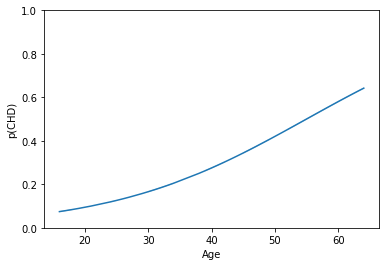

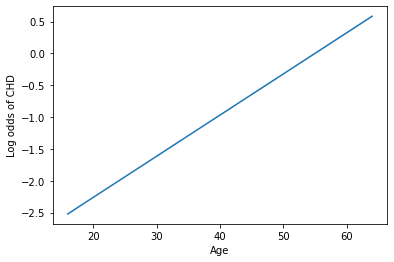

In [9]:
# Let's implement the above transformation here
ypreds = np.exp(log_reg.intercept_ + log_reg.coef_*xtest) / (1 + np.exp(log_reg.intercept_ + log_reg.coef_*xtest))

# Now we can confirm that this worked
g = sns.lineplot(x = xtest[:, 0], y = ypreds[:, 0])
g.set_ylim(0, 1)
g.set_xlabel("Age")
g.set_ylabel("p(CHD)")
plt.show()

# Finally, let's look at the "linear" relationship underlying logistic regression
h = sns.lineplot(x = xtest[:, 0], y = np.log(ypreds[:, 0]/(1-ypreds[:, 0])))
h.set_xlabel("Age")
h.set_ylabel("Log odds of CHD")
plt.show()

**Understanding the classification**

Note, the classification boundary of 50% that we used based on our logistic function's $p(y)$ is somewhat arbitrary. 

As with $k$-nearest neighbors, we can modify that classification threshold and generate an ROC curve over different thresholds.

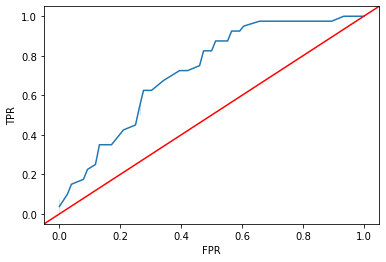

In [10]:
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(
    y_true = ytest,
    y_score = log_reg.predict_proba(X = xtest)[:, 1],
    pos_label = 1
)


sns.lineplot(x = fpr, y = tpr)
plt.axline(xy1 = (0, 0), slope = 1, c = "r")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Decision Trees

Decision trees are a form of classification that fits a model by generating successive *rules* based on the input feature values. These rules are optimized to try and classify the data as accurately as possible.

![decision_tree](img/Decision_Tree.jpeg)

Above, the percentages are the percent of data points in each node and the proportions are the probability of survival ([Source](https://en.wikipedia.org/wiki/Decision_tree_learning)).

*Take a second to interpret this*.

Decision trees have the advantage of being super intuitive (like $k$-nearest neighbors, they're similar to how people often think about classification). 

There's a great article about how they work [here](https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575) and a nice explanation of how the decision boundaries are identified [here](https://victorzhou.com/blog/gini-impurity/).

### Decision tree classifiers in python

You can read the decision tree classifier documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [11]:
# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
dtree = DecisionTreeClassifier(random_state = 1)

# Fit the model
dtree.fit(X = xtrain, y = ytrain)

DecisionTreeClassifier(random_state=1)

[Text(172.40380434782608, 209.07692307692307, 'X[0] <= 50.5\ngini = 0.453\nsamples = 346\nvalue = [226, 120]'),
 Text(52.767391304347825, 192.35076923076923, 'X[0] <= 24.5\ngini = 0.339\nsamples = 217\nvalue = [170, 47]'),
 Text(14.556521739130435, 175.62461538461537, 'X[0] <= 19.5\ngini = 0.038\nsamples = 51\nvalue = [50, 1]'),
 Text(7.278260869565218, 158.89846153846153, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(21.834782608695654, 158.89846153846153, 'X[0] <= 20.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(14.556521739130435, 142.1723076923077, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(29.11304347826087, 142.1723076923077, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(90.97826086956522, 175.62461538461537, 'X[0] <= 31.5\ngini = 0.401\nsamples = 166\nvalue = [120, 46]'),
 Text(58.22608695652174, 158.89846153846153, 'X[0] <= 28.5\ngini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(43.66956521739131, 142.1723076923077, 'X[0] <= 25.5\ngini = 0.415\ns

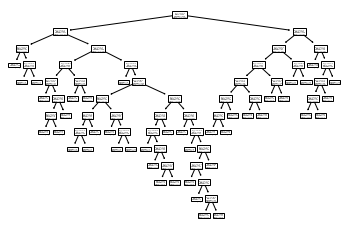

In [12]:
from sklearn import tree

tree.plot_tree(dtree)

Whoa. 

**Decision trees can overfit data *a lot* if they aren't constrained.**

In [13]:
dtree.score(X = xtrain, y = ytrain)
dtree.score(X = xtest, y = ytest)

# Seems like we're overfitting

0.646551724137931

*Let's try this again...*

In [14]:
dtree = DecisionTreeClassifier(
    # how many layers our decision tree should have (toggle between 1 and 2 and see how this impacts results)
    max_depth = 1,
    random_state = 1
)

# Fit the model
dtree.fit(X = xtrain, y = ytrain)

DecisionTreeClassifier(max_depth=1, random_state=1)

[Text(167.4, 163.07999999999998, 'Age <= 50.5\ngini = 0.453\nsamples = 346\nvalue = [226, 120]\nclass = No CHD'),
 Text(83.7, 54.360000000000014, 'gini = 0.339\nsamples = 217\nvalue = [170, 47]\nclass = No CHD'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.491\nsamples = 129\nvalue = [56, 73]\nclass = CHD')]

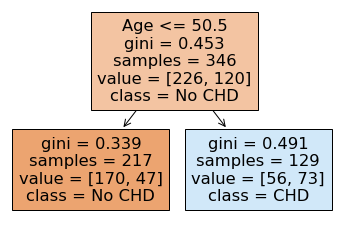

In [15]:
tree.plot_tree(dtree,
               feature_names = ['Age'],
               class_names = ['No CHD', 'CHD'],
               filled = True
              )


***What's going on here?***

- `Age <= 50.5`: This is the "rule" being used to define leaves on either side of the tree ("No" -> left, "Yes" -> right)
- `gini = 0.453`: This refers to the "Gini impurity" of the node. Gini impurity is the loss function used to fit this tree (optimal = 0) (more on this [here](https://victorzhou.com/blog/gini-impurity/))
- `samples = 346`: This is the number of samples in the group that the node is dividing
- `value = [226, 120]`: This is the number of training values on the left (`values[0]`) and the right (`values[1]`) of the node

NOTE: With a depth of 1, at the very bottom, we have:
- 170 people were correctly classified as "No CHD" with this rule (true negatives)
- 47 people were classified as "No CHD" with this rule *incorrectly* (false negatives)
- 56 people were classified as "CHD" with this rule *incorrectly* (false positives)
- 73 people were classified as "CHD" with this rule *correctly* (true positives)

Like other classifiers, the decision tree classifier lets us predict values and has functions for assessing prediction accuracy.

In [16]:
# Accuracy on the data
dtree.score(X = xtrain, y = ytrain)
dtree.score(X = xtest, y = ytest)

0.6810344827586207

In [17]:
ypreds = dtree.predict(X = xtest)
ypreds

# Test `score` above
sum(ypreds == ytest) / len(ypreds)

0.6810344827586207

In [18]:
# The "soft classification" probabilities are just the fraction of training samples for the "true" label 
# in the leaf where this test item ended up

ypreds_soft = dtree.predict_proba(X = xtest)
ypreds_soft

array([[0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.43410853, 0.56589147],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.43410853, 0.56589147],
       [0.78341014, 0.21658986],
       [0.43410853, 0.56589147],
       [0.43410853, 0.56589147],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.43410853, 0.56589147],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.43410853, 0.56589147],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.43410853, 0.56589147],
       [0.78341014, 0.21658986],
       [0.78341014, 0.21658986],
       [0.43410853, 0.56589147],
       [0.43410853, 0.56589147],
       [0.

We can use the predictions as the basis for better understanding what the tree is doing:

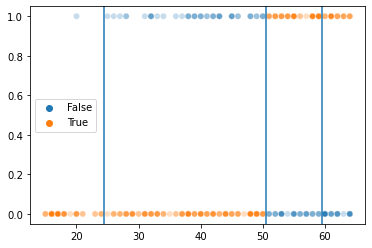

In [19]:
# This reveals the cutoff(s) chosen by our decision tree! 
train_preds = dtree.predict(X = xtrain)

g = sns.scatterplot(x = xtrain[:, 0], y = ytrain, hue = ytrain == train_preds, alpha = .25)
# These are the decision boundaries in the tree. You can see how they segment our data into more accurate predictions
g.axvline(50.5)
g.axvline(59.5)
g.axvline(24.5)



In [20]:
### YOUR CODE HERE

# Make a similar graph to the above with the test data

We can also draw on the same resources that we talked about for assessing our $k$-nearest neighbors classifier:
- Accuracy / F1 score
- ROC curves

In [21]:
from sklearn.metrics import accuracy_score, f1_score


# Test accuracy
accuracy_score(y_true = ytest, y_pred = dtree.predict(X = xtest))

# Test F1 score
f1_score(y_true = ytest,
         y_pred = dtree.predict(X = xtest),
         labels = [0, 1],
         pos_label = 1
        )

0.5542168674698795

Text(0, 0.5, 'TPR')

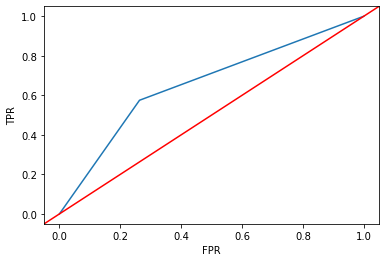

In [22]:
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(
    y_true = ytest,
    y_score = dtree.predict_proba(X = xtest)[:, 1],
    pos_label = 1
)


sns.lineplot(x = fpr, y = tpr)
plt.axline(xy1 = (0, 0), slope = 1, c = "r")

plt.xlabel("FPR")
plt.ylabel("TPR")

## Support Vector Machines (SVMs)

Support Vector Machines work by trying to find a line or plane (usually in a high-dimensional space) that *maximally separates* the training labels in that space. 

The intuition for this is relatively straightforward but the implementation can get complicated!

In the plot below, the linear funtion $h_3(x_1, x_2)$ is the best way to separate our training data because it maximizes the margin on either side of the line.

SVMs try to find the equivalent of $h_3$ given some training data. This separator can be defined by the closest points in the data to the line; these are called the "support vectors". Finding the best separator usually requires mapping the training data into a high-dimensional space where it can be effectively separated.

![svm](img/svm2.png)

([Source](https://en.wikipedia.org/wiki/Support-vector_machine))

### SVMs in python

The documentation for SVMs in scikit-learn is [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [23]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(xtrain, ytrain)

SVC()

In the case of SVMs, there are class attributes that help you recover the separator that was fit.

We won't get into these but if you're interested in learning more it's good to know about!


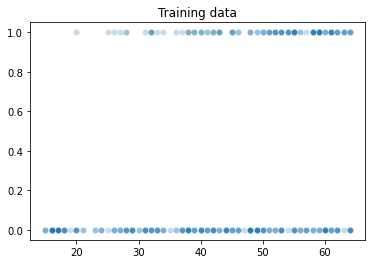

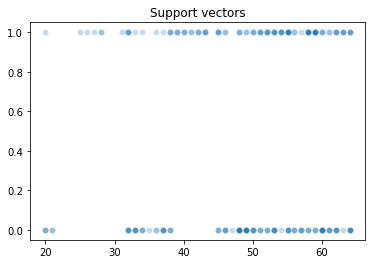

In [24]:
# svm.intercept_
# svm.coef_ # only for 'linear' kernel
# svm.support_vectors_

# For example, we can view the items in the training set that formed the support vector
sns.scatterplot(x = xtrain[:, 0], y = ytrain, alpha = .25)
plt.title("Training data")
plt.show()

sns.scatterplot(x = xtrain[svm.support_][:, 0], y = ytrain[svm.support_], alpha = .25)
plt.title("Support vectors")
plt.show()

The SVM class has a `score` function that returns the accuracy of a test set, plus prediction functions.

In [25]:
# Percent of correct classifications
svm.score(X = xtrain, y = ytrain)
svm.score(X = xtest, y = ytest)

0.646551724137931

In [26]:
ypreds = svm.predict(X = xtest)
ypreds

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1])

However, soft prediction requires configuring the initial model to do soft classification (by default, SVMs are made to only do hard classification).

In [27]:
svm_soft = SVC(probability = True) # indicate that you want the SVM to do soft classification
svm_soft.fit(X = xtrain, y = ytrain)

ypreds_soft = svm_soft.predict_proba(X = xtest)
ypreds_soft

array([[0.71971361, 0.28028639],
       [0.72063653, 0.27936347],
       [0.67868053, 0.32131947],
       [0.72025123, 0.27974877],
       [0.44383188, 0.55616812],
       [0.71972589, 0.28027411],
       [0.72407255, 0.27592745],
       [0.51169367, 0.48830633],
       [0.72063653, 0.27936347],
       [0.44758618, 0.55241382],
       [0.47107807, 0.52892193],
       [0.72007526, 0.27992474],
       [0.71972589, 0.28027411],
       [0.44914516, 0.55085484],
       [0.71846213, 0.28153787],
       [0.67868053, 0.32131947],
       [0.720486  , 0.279514  ],
       [0.53650348, 0.46349652],
       [0.71846213, 0.28153787],
       [0.72398331, 0.27601669],
       [0.71973359, 0.28026641],
       [0.71973359, 0.28026641],
       [0.70502942, 0.29497058],
       [0.72063653, 0.27936347],
       [0.71971361, 0.28028639],
       [0.45871708, 0.54128292],
       [0.72063653, 0.27936347],
       [0.71346947, 0.28653053],
       [0.45871708, 0.54128292],
       [0.44383188, 0.55616812],
       [0.

# Classifier Wrap-Up

This is just a sample of what's out there!

There are a number of other common classifiers you should take a look at if you're interested:
- Naive Bayes ([here](https://scikit-learn.org/stable/modules/naive_bayes.html))
- Discriminant analysis ([linear](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) and [quadratic](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html))
- Neural networks ([here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html))
- Random forests ([here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) (related to decision trees)
- Gradient boosted trees ([here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html))
- ...

The main goal of this lecture is to show you some of the creative ways that people solve classification problems and how the scikit-learn library supports these solutions. 

This should empower you to go off and try some of these other ones on your own!